In [ ]:
### Arahan Assignment
0. Gunakan dataset student score
1. Lakukan proses Exploratory data analysis
2. Lakukan feature engineering :
- Check Duplicated Data
- Check Missing Value Handling
- Outlier Analysis
3. Lakukan modelling machine learning regression : gunakan minimal 2 model (linear regression, decision tree regressor, atau random forest regressor)
4. Lakukan evaluasi model
5. Berikan kesimpulan model mana yang terbaik performanya

In [2]:
# Import libraries and resources
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#0. student score data
file_path = '/content/student_scores.csv'
dataset = pd.read_csv(file_path)
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Exploratory Data

In [4]:
#1. explanatory data
dataset.info()

dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
dataset.describe()
# this describes the basic stat behind the dataset used

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

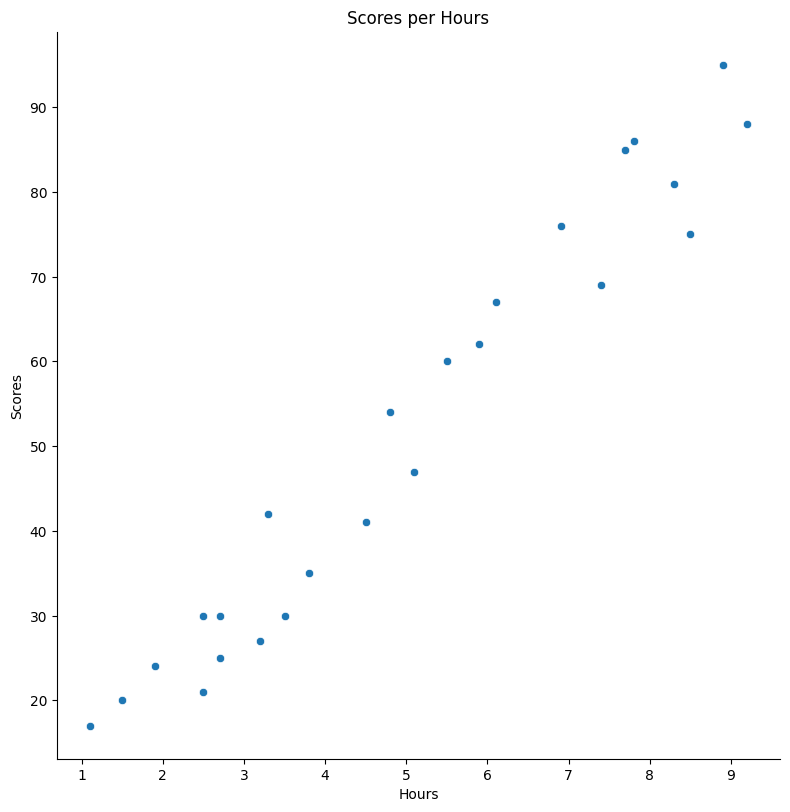

In [6]:
# These Plots help to explain the values and how they are scattered

plt.figure(figsize=(12,6))
sns.pairplot(dataset,x_vars=['Hours'],y_vars=['Scores'],size=8,kind='scatter')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scores per Hours')
plt.show()

2.Feature Engineering

In [8]:
# duplicate data

df = dataset.copy()
print("Data Sebelum Pemeriksaan Duplikat:")
print(df.shape)
duplicate_rows_before = df[df.duplicated()]
duplicate_rows_before
print("\nData Setelah Pemeriksaan Duplikat:")
print(df.shape)

Data Before Duplicate Check:
(25, 2)


In [9]:
dcp_beforecheck = df[df.duplicated()]
dcp_beforecheck

,Hours,Scores


In [10]:
df = df.drop_duplicates()

In [11]:
print("Data After Duplicate Check:")
print(df.shape)

Data After Duplicate Check:
(25, 2)


In [12]:
#Check missing value
df.isna().sum()

,0
Hours,0
Scores,0


Missing Value Check

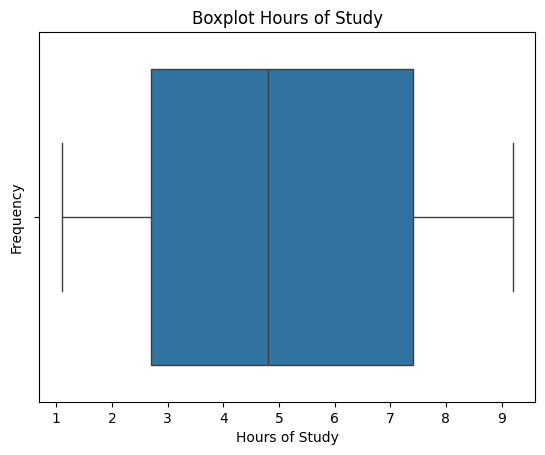

In [13]:
# Outlier Analysis
sns.boxplot(x="Hours", data=df)

# Menambahkan label sumbu dan judul
plt.xlabel("Hours of Study")
plt.ylabel("Frequency")  # Anda bisa menggunakan "Years of Experience" atau "Tahun Pengalaman"
plt.title("Boxplot Hours of Study")

# Menampilkan plot
plt.show()

Outlier Analysis

In [14]:
# Experience of Hours data
X = dataset['Hours']
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [15]:
# Scores data
y = dataset['Scores']
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [16]:
# Import machine learning data from scikit learn
from sklearn.model_selection import train_test_split

In [17]:
# Split the data for train and test
# train : test = 75 : 25 atau 80 : 20 atau 70:30 atau 85:15 , size train > test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=42)

In [18]:
X_train

,Hours
1,5.1
22,3.8
5,1.5
2,3.2
12,4.5
15,8.9
3,8.5
4,3.5
20,2.7
17,1.9


In [19]:
X_test

,Hours
8,8.3
16,2.5
0,2.5
23,6.9
11,5.9
9,2.7
13,3.3


Linear Regression

In [20]:

from sklearn.linear_model import LinearRegression

In [21]:

import numpy as np

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()


X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [22]:
X_train #array

array([[5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [23]:
X_test #array

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [24]:
y_train

,Scores
1,47
22,35
5,20
2,27
12,41
15,95
3,75
4,30
20,30
17,24


In [25]:
y_test

,Scores
8,81
16,30
0,21
23,76
11,62
9,25
13,42


In [26]:

lr_model = LinearRegression() 
lr_model.fit(X_train,y_train) 

LinearRegression()

In [27]:
y_pred_train = lr_model.predict(X_train)
y_pred_train

array([52.02223727, 39.39391742, 17.05150538, 33.56546211, 46.19378196,
       88.93578761, 85.05015073, 36.47968977, 28.70841601, 20.93714226,
       49.10800962, 61.73632947, 78.25028619, 55.90787415, 77.27887697,
       13.1658685 , 74.36464932, 91.85001526])

In [28]:
y_train

,Scores
1,47
22,35
5,20
2,27
12,41
15,95
3,75
4,30
20,30
17,24


In [29]:

y_pred = lr_model.predict(X_test) 

In [30]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [31]:
y_pred

array([83.10733229, 26.76559757, 26.76559757, 69.50760322, 59.79351103,
       28.70841601, 34.53687133])

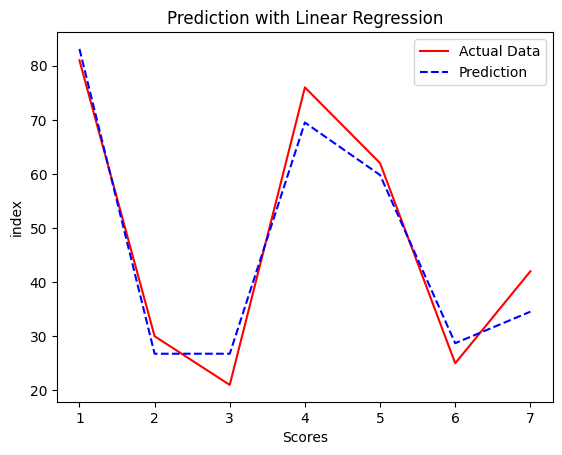

In [32]:


c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Scores')
plt.ylabel('index')
plt.title('Prediction with Linear Regression')
plt.legend()
plt.show()

In [33]:

from sklearn.metrics import r2_score,mean_squared_error

In [34]:
rsq = r2_score(y_test,y_pred) 

In [35]:
print('r square Linear Regression:',rsq)

r square Linear Regression: 0.9553509219739938


In [36]:

print('Intercept of the Linear Regression model:',lr_model.intercept_)
print('Coefficient of the line Linear Regression:',lr_model.coef_)

Intercept of the Linear Regression model: 2.4803670915057623
Coefficient of the line Linear Regression: [9.71409219]


Decision Tree 

In [37]:
from sklearn.tree import DecisionTreeRegressor # mahasiswa B

In [38]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [39]:
# Predicting the Salary for the Test values
y_pred_dt = dt_model.predict(X_test) # soal uts maupun uas

In [40]:
y_pred_dt

array([75., 30., 30., 69., 67., 30., 27.])

In [41]:
y_test

,Scores
8,81
16,30
0,21
23,76
11,62
9,25
13,42


In [42]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

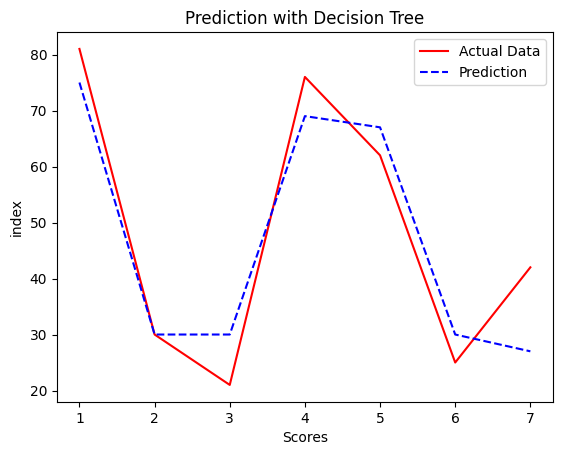

In [43]:

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_dt,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Scores')
plt.ylabel('index')
plt.title('Prediction with Decision Tree')
plt.legend()
plt.show()

In [44]:

rsq_dt = r2_score(y_test,y_pred_dt)
print('r square Decision Tree Results:',rsq_dt)

Evaluasi Model: 

Kesimpulannya adalah, meskipun model Decision Tree memiliki nilai evaluasi yang lebih tinggi (0,880) dibandingkan dengan Linear Regression, model Linear Regression dianggap lebih baik karena memberikan output yang lebih rinci dan informasi yang lebih lengkap sesuai kebutuhan, meskipun kode yang dihasilkan lebih panjang dibandingkan dengan metode Decision Tree